In [1]:
# Irfan Rifqi bin Azmi 1919045
# Muhammad Zulfikhry bin Ahmad Zolfi 1920691
# Wan Fathihul Akram bin Wan Mansor 1914131
# Abdulrahman Alaidaros 1826053

# Import Libraries from 
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
# Authentication
consumerKey = 'besptMmssSrqTDxgGCXjimxko'
consumerSecret = 'fTfoq7G757chyrTIciQMwUoB1mUF5EUE8o5CjunVArOI6cfx25'
accessToken = '997954534554005504-y5AjthbzSG853CqIwHa7Dp6loOotwDX'
accessTokenSecret = 'gYlaYVi7ERT0rDjI9Gb1dEVKeXmn89LptUHlp1pQCLgbM'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [19]:
from textblob import TextBlob


def percentage(part, whole):
    return 100 * float(part)/float(whole)

keywords = '#BatangKali , #BatangKaliLandslide , #landslide , #tanahruntuh'
keywords = keywords.replace(',',' OR ')
noOfTweet = 100

tweets = tweepy.Cursor(api.search_tweets ,q=keywords  ,lang='en',geocode = '3.180967,101.715546,1000km' ).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweets in tweets:
    print(tweets.text)
    tweet_list.append(tweets.text)
    analysis = TextBlob(tweets.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweets.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweets.text)
        negative += 1
      

    elif pos > neg:
        positive_list.append(tweets.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweets.text)
        neutral += 1

positive_score = percentage(positive, noOfTweet)
neutral_score = percentage(neutral, noOfTweet)
negative_score = percentage(negative, noOfTweet)

print("Positive tweets percentage: ", positive_score)
print("Neutral tweets percentage: ", neutral_score)
print("Negative tweets percentage: ", negative_score)



Statement: Checks found that soil movements are still occurring and the road will be closed.

#theSun #theSundaily… https://t.co/z3J12GRtAo
#NSTnation A 54- second voice note went viral on social media alleging that there had been a #landslide at… https://t.co/JgKWl63soy
My prayers &amp; respect to the #BatangKali victims this Chinese New Year who have passed away. 
Wishing their family p… https://t.co/mMaJRZdBh2
#NSTnation The full #report on the #landslide tragedy at the Father's Organic Farm campsite in #BatangKali, Selango… https://t.co/g97pf3E9pQ
'The full report of the incident will be tabled to the Cabinet'

#theSun #theSundaily #news #Malaysia #batangkali… https://t.co/PPtmCwyQ2A
The full report on the landslide tragedy which occurred last December at the Father's Organic Farm campsite in Bata… https://t.co/9C2OlpWGj0
A preliminary report was tabled in the Cabinet earlier this month during which several issues were raised to make t… https://t.co/awFnQRJzgf
#BatangKali #landslid

<AxesSubplot:xlabel='sentiment', ylabel='percentage'>

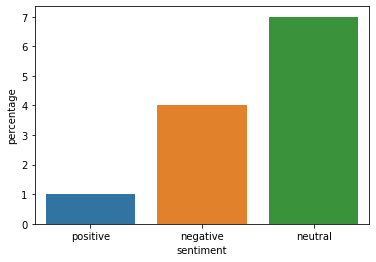

In [21]:
import seaborn as sns

data = {'sentiment': ['positive', 'negative', 'neutral'], 'percentage': [positive, negative, neutral]}
df = pd.DataFrame(data)

sns.barplot(x='sentiment', y='percentage', data=df)
